In [2]:
### Mutation analysis ###
# r only - No IgM

# observedMutations function calualte the basic mutational load. 
# Mutations can be calculated as counts or frequencies and divided into replacement (R) or 
# silent (S) mutations, and subset into FWR and CDR specific mutations. 

# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

# loading my tsv as a df
require(data.table)
my_data <- as.data.frame(fread("r_no_igm_filtered_contig_heavy_germ-pass.tsv"))


# Load and subset example data
db <- subset(my_data, c_call %in% c("IGHA", "IGHM", "IGHG","IGHD"))

In [3]:
# Calculate R and S mutation counts
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=1)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=10)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,GACTACATCACAATGC-1_contig_1,16,9
2,GCTGCAGAGAGTCTGG-1_contig_2,6,4
3,TGATTTCCAAGCCCAC-1_contig_2,10,7
4,GGGATGAGTGAGCGAT-1_contig_1,17,10
5,GGACAGAGTGTGACCC-1_contig_1,16,8
6,CTCGTCATCAGGTTCA-1_contig_2,2,0
7,CAGAGAGCATCGGGTC-1_contig_2,1,0
8,TAGTGGTAGTCAAGGC-1_contig_1,7,7
9,AAGCCGCAGGAGTAGA-1_contig_2,7,7


In [4]:
# Calculate R and S mutation frequencies
db_obs <- observedMutations(db_obs, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=10)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,GACTACATCACAATGC-1_contig_1,0.047058824,0.026470588
2,GCTGCAGAGAGTCTGG-1_contig_2,0.017595308,0.011730205
3,TGATTTCCAAGCCCAC-1_contig_2,0.029585799,0.020710059
4,GGGATGAGTGAGCGAT-1_contig_1,0.050445104,0.029673591
5,GGACAGAGTGTGACCC-1_contig_1,0.047337278,0.023668639
6,CTCGTCATCAGGTTCA-1_contig_2,0.005830904,0.000000000
7,CAGAGAGCATCGGGTC-1_contig_2,0.002932551,0.000000000
8,TAGTGGTAGTCAAGGC-1_contig_1,0.020958084,0.020958084
9,AAGCCGCAGGAGTAGA-1_contig_2,0.020958084,0.020958084


In [5]:
# Calculate combined R and S mutation frequencies
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            combine=TRUE,
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id
,<chr>
1,GACTACATCACAATGC-1_contig_1
2,GCTGCAGAGAGTCTGG-1_contig_2
3,TGATTTCCAAGCCCAC-1_contig_2
4,GGGATGAGTGAGCGAT-1_contig_1


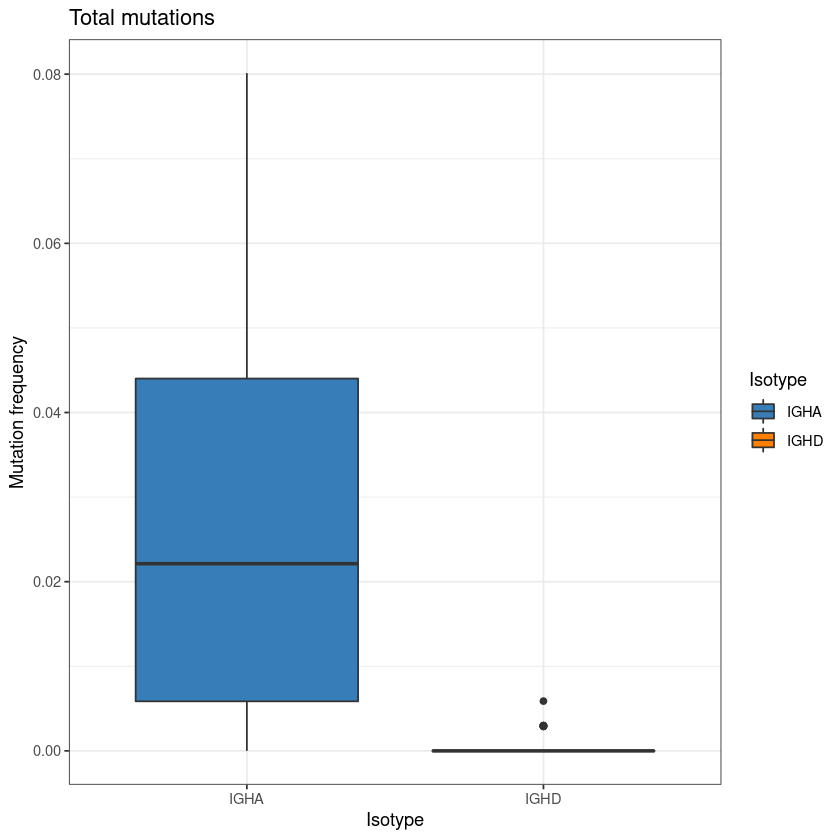

In [6]:
g1 <- ggplot(db_obs, aes(x=c_call, y=mu_freq, fill=c_call)) +
    theme_bw() + ggtitle("Total mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g1)

In [7]:
# Calculate R and S mutation counts for individual CDRs and FWRs
db_obs_v <- observedMutations(db, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V_BY_REGIONS,
                              frequency=FALSE, 
                              nproc=1)
# Show new FWR mutation columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_count_fwr")) %>%
    head(n=4)

,sequence_id,mu_count_fwr1_r,mu_count_fwr1_s,mu_count_fwr2_r,mu_count_fwr2_s,mu_count_fwr3_r,mu_count_fwr3_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GACTACATCACAATGC-1_contig_1,3,1,2,2,5,5
2,GCTGCAGAGAGTCTGG-1_contig_2,2,1,0,1,1,2
3,TGATTTCCAAGCCCAC-1_contig_2,1,0,1,1,3,2
4,GGGATGAGTGAGCGAT-1_contig_1,3,2,3,1,4,4


In [8]:
# Calculate aggregate CDR and FWR V-segment R and S mutation frequencies
db_obs_v <- observedMutations(db_obs_v, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V,
                              frequency=TRUE, 
                              nproc=1)
# Show new CDR and FWR mutation frequency columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_cdr_r,mu_freq_cdr_s,mu_freq_fwr_r,mu_freq_fwr_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,GACTACATCACAATGC-1_contig_1,0.10416667,0.02083333,0.04166667,0.03333333
2,GCTGCAGAGAGTCTGG-1_contig_2,0.02083333,0.00000000,0.01250000,0.01666667
3,TGATTTCCAAGCCCAC-1_contig_2,0.10416667,0.06250000,0.02083333,0.01250000
4,GGGATGAGTGAGCGAT-1_contig_1,0.12500000,0.04166667,0.04166667,0.02916667


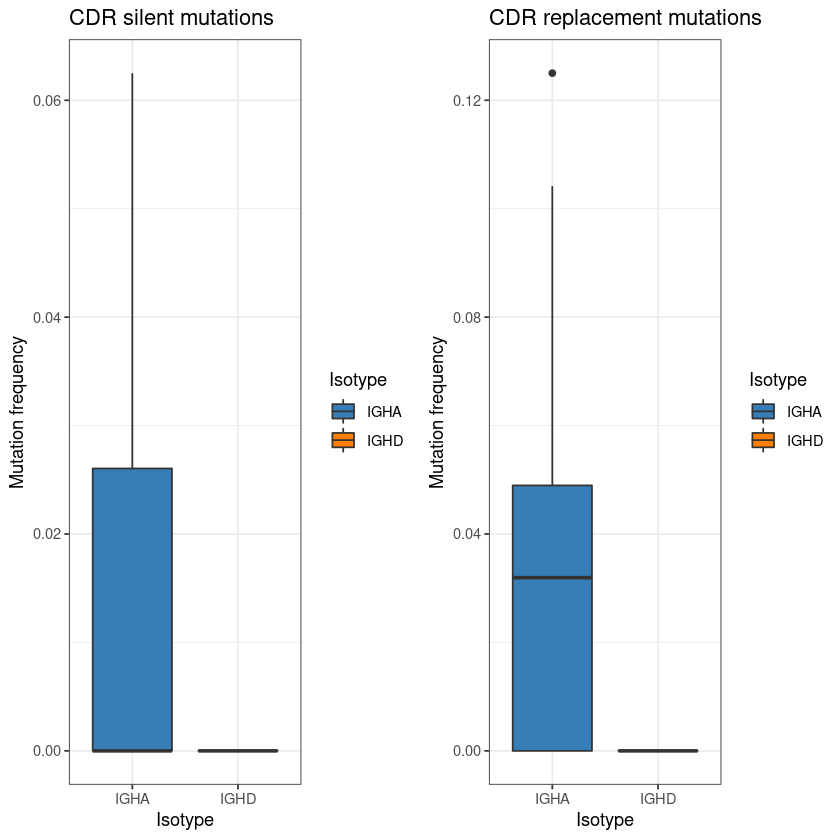

In [9]:
g2 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_s, fill=c_call)) +
    theme_bw() + ggtitle("CDR silent mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
g3 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_r, fill=c_call)) +
    theme_bw() + ggtitle("CDR replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
alakazam::gridPlot(g2, g3, ncol=2)

In [10]:
# Calculate charge mutation frequency for the full sequence
db_obs_ch <- observedMutations(db, sequenceColumn="sequence_alignment",
                               germlineColumn="germline_alignment_d_mask",
                               regionDefinition=NULL,
                               mutationDefinition=CHARGE_MUTATIONS,
                               frequency=TRUE, 
                               nproc=1)
# Show new charge mutation frequency columns
db_obs_ch %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,GACTACATCACAATGC-1_contig_1,0.014705882,0.05882353
2,GCTGCAGAGAGTCTGG-1_contig_2,0.002932551,0.02639296
3,TGATTTCCAAGCCCAC-1_contig_2,0.002958580,0.04733728
4,GGGATGAGTGAGCGAT-1_contig_1,0.002967359,0.07715134


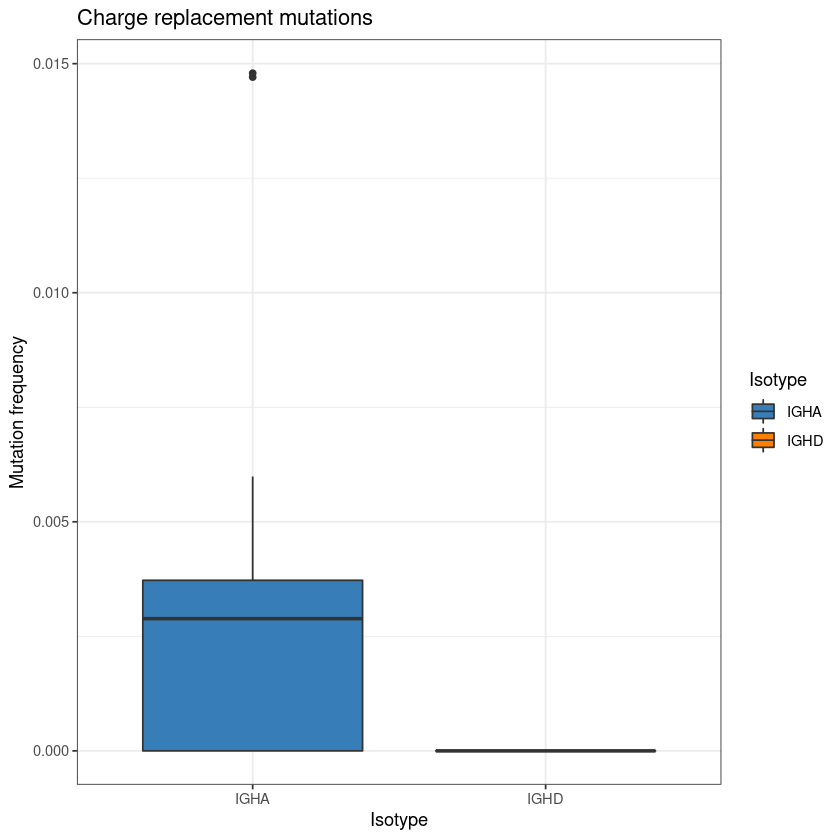

In [11]:
g4 <- ggplot(db_obs_ch, aes(x=c_call, y=mu_freq_seq_r, fill=c_call)) +
    theme_bw() + ggtitle("Charge replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g4)